# Lab: Dimensionality Reduction
Data Mining 2021/2022  
Mirco Kroon and Gosia Migut  
Revised by Aleksander Buszydlik

**WHAT** This optional lab consists of several programming exercises and insight questions. 
These exercises are ment to let you practice with the theory covered in [Chapter 11 (section 4)][1] from "Mining of Massive Datasets" by J. Leskovec, A. Rajaraman, J. D. Ullman.

**WHY** Practicing, both through programming and answering the insight questions, aims at deepening your knowledge and preparing you for the exam. 

**HOW** Follow the exercises in this notebook either on your own or with a friend. Use [StackOverflow][2]
to discuss the questions with your peers. For additional questions and feedback please consult the TAs during the assigned lab session. The answers to these exercises will not be provided. 

[1]: http://infolab.stanford.edu/~ullman/mmds/ch11.pdf
[2]: https://stackoverflow.com/c/tud-cs/questions

**Note: This method of calculating matrix U was updated in this lab. If you have solved the previous version of the notebook, you may want to copy the relevant code block from Step 4 of Exercise 1 and rerun the notebook.**

#### Summary

In the following two exercises you will learn about CUR decomposition on a dataset:
* Exercise 1: Implementing CUR
* Exercise 2: Comparing performance of CUR and SVD

This lab assignment is based on CUR-decomposition as described in section 11.4 of the course book. It is therefore advised that you read the section before making this assignment. That way, you will be able to use the example in the book to validate your solution.

## Exercise 1: Implementing CUR

CUR is one of the two algorithms for matrix decomposition that you encountered during the lecture. Compared to Singular Value Decomposition, it does not guarantee the optimal solution (such that it minimizes the deconstruction error), however, it has other important advantages. First, most of the matrices that you may want to decompose are sparse. For example, when working with a matrix of user ratings about their purchases at an online store most users would have only bought a few items, and most items would have been rated by a few users. The CUR decomposition is able to preserve that sparsity of the original matrix. Second, columns of the $C$ matrix and rows of the $R$ matrix come from the original matrix $M$ which helps with interpretability. In the following exercise you will create your own implementation of the CUR decomposition.

### Step 0: Initializing data matrix
For our input, we will use the example from the book. Note that your answers may differ due to the probabilistic nature of the algorithm. Using a fixed random seed may help to make your solutions deterministic.

Below is the dataset of film ratings that we we will be using:
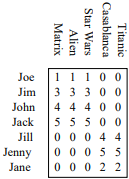

A matrix of this data is given below.

In [ ]:
import numpy as np
import time

M = np.matrix([
    [1, 1, 1, 0, 0],
    [3, 3, 3, 0, 0],
    [4, 4, 4, 0, 0],
    [5, 5, 5, 0, 0],
    [0, 0, 0, 4, 4],
    [0, 0, 0, 5, 5], 
    [0, 0, 0, 2, 2]   
])

print(M)

### Step 1: Implement `compute_column_probabilities`

In order to do the CUR decomposition, we will create our three matrices one at a time, starting with matrix `C`. Matrix `C` consists of columns from `M` chosen based on a weighed probability distribution such that more "important" columns have a higher chance of being chosen.

First we need to compute the weighed probabilities so that we can use this later to select our columns. The probability for each column is computed by the sum of squares of the values in the column, divided by the sum of squares of all values in the matrix. For example, the first column in the example will have a probability of 51/243 = 0.210.

Finish the function given below which will return an array of probabilities for each of the columns.

In [ ]:
from numpy.testing import assert_array_almost_equal

def compute_column_probabilities(M):
    probabilities = np.zeros(M.shape[1])
    
    # START ANSWER
    # END ANSWER
    
    return probabilities

assert_array_almost_equal(compute_column_probabilities(M), np.array([0.21, 0.21, 0.21, 0.19, 0.19]), decimal=2)

$\textbf{Question 1}$: Why is it necessary to compute these probabilities? What do they tell us?

### Step 2: Construct the matrix `C`
We will use the generated probability distribution to randomly select $r$ columns for our matrix $C$, such that the columns with a higher probability assigned to them have a higher chance of being picked.

Then, we must scale each column by its probability of being chosen. This is given by $\sqrt{r * p}$, where $r$ is the number of columns we are selecting and $p$ is the probability of a specific column. For example, let's say we take a sample of 2 columns ($r = 2$). For our first column of $C$, we might get the first column of $M$, which will then be divided by $\sqrt{2 * 0.210}$ to get our final column for $C$. 

Implement the function below to randomly select $r$ columns from the matrix $M$, and then place the scaled columns in output matrix $C$.  
**Note:** The function must return both the matrix $C$ and the indices for the selected columns, as these will be needed later.  
**Hint:** You can use the `numpy.random.choice` to select columns based on the probabilities.

In [ ]:
from numpy.random import choice
import math

# Note that since the selection process for CUR is random, we need to set the seed to make our results deterministic
np.random.seed(42)

def construct_c(M, r):
    C = np.zeros([M.shape[0], r])
    
    # START ANSWER
    # END ANSWER
    
    return C, columns

C, columns = construct_c(M, 2)
expected_C = np.array([[1.54, 0.], [4.63, 0.], [6.17, 0.], [7.72, 0.], [0., 6.57], [0., 8.22], [0., 3.29]])

assert_array_almost_equal(C, expected_C, decimal=2)
assert np.array_equal(columns, np.array([1, 4]))

### Step 3 Construct the matrix `R`
Now complete the implementation of $R$ which is similar to matrix $C$, but contains a selection of rows from the original matrix. Again, the function must return both the matrix $R$ and the indices for the selected rows.  
**Hint:** This may be significantly fewer lines of code now that you have already implemented `construct_c`

In [ ]:
np.random.seed(42)

def construct_r(M, r):

    # START ANSWER
    # END ANSWER
    
    
R, rows = construct_r(M, 2)
expected_R = np.array([[6.36, 6.36, 6.36, 0., 0.], [0., 0., 0., 7.79, 7.79]])

assert_array_almost_equal(R, expected_R, decimal=2)
assert np.array_equal(rows, np.array([3, 5]))

### Step 4: Construct the matrix `U`
To complete our CUR decomposition, we also need to compute the matrix $U$. The input for this function will include the indices for the selected rows and columns from the construction of matrices $C$ and $R$.

Matrix $U$ is based on another matrix $W$, both of which are $r \times r$ matrices. In $W$, the value at $(i, j)$ is the value in matrix $M$ from the $i^{th}$ selected row and the $j^{th}$ selected column. For example, if our first column of $C$ was column 2 and our first row of $R$ was row 3, then the value at the top-left element in $W$ will be $4$.

Complete the implementation of the function `construct_u` which creates the matrix $W$, and afterwards computes $U$ and returns it.

In [ ]:
def construct_u(M, r, rows, columns):
    W = np.zeros([r, r])
    
    # START ANSWER
    # END ANSWER 
        
    # Compute U based on the matrix W
    X, E, Yt = np.linalg.svd(W) # Decompose W
    E =  np.linalg.pinv(np.diag(E)) # Find pseudo-inverse of the E matrix
    U = np.matmul(np.matmul(Yt.T, E), X.T) # Multiply matrices to get U
    
    return U
    
assert_array_almost_equal(construct_u(M, 2, rows, columns), np.array([[0.2, 0.], [0., 0.2]]), decimal=2)

In [ ]:
# You can run this code to verify your implementation on a more complex example
np.random.seed(10)

_, test_columns = construct_c(M, 3)
_, test_rows = construct_r(M, 3)

expected_u = np.array([[0.125, 0., 0.], [0., 0.122, 0.098], [0.125, 0., 0.]])
assert_array_almost_equal(construct_u(M, 3, test_rows, test_columns), expected_u, decimal=3)

### Step 5: Calculate the final CUR matrix
Now that we are able to compute each of the three matrices, we can finally compute our CUR matrix as $C \times U \times R$. Complete the function below by adding the computations for $C$, $R$ and $U$.

In [ ]:
np.random.seed(42)

def cur(M, r):
    
    # START ANSWER
    # END ANSWER
        
    return C, U, R

C, U, R = cur(M, 7)

expected_matrix = np.array([[0.68, 0.68, 0.68, 0., 0.], [2.02, 2.02, 2.02, 0., 0.],
                            [2.69, 2.69, 2.69, 0., 0.], [3.37, 3.37, 3.37, 0., 0.],
                            [0., 0., 0., 3.35, 3.35], [0., 0., 0., 4.18, 4.18], [0., 0., 0., 1.68, 1.68]])
assert_array_almost_equal(np.matmul(np.matmul(C, U), R), expected_matrix, decimal=2)

## Exercise 2:  Comparing performance of CUR and SVD

### Step 1: Generate a random matrix

Now that we have implemented CUR decomposition, we would like to compare its efficiency with the regular SVD. First, let's generate some random data. Complete the `set_value` lambda function below to generate a large sparse matrix with random ratings between 1 and 5.

In [ ]:
density = 0.10
width = 1000
height = 10000

def generate_sparse_matrix(density, width, height):
    M = np.zeros([width, height])
    
    set_value = lambda x: 0
    # START ANSWER
    # END ANSWER
    return np.vectorize(set_value)(M)

print("Generating data ...")
M = generate_sparse_matrix(density, width, height)
print("Done!")

### Step 2: Compare run times
Finally, let's use this generated matrix to compare the running time of the two algorithms. Run both of them below and compare the results.

In [ ]:
print("Running SVD decomposition ...")

start = time.time()
np.linalg.svd(M)
end = time.time()

print("Completed in: " + str(round(end - start, 2)) + " seconds")

In [ ]:
print("Running CUR decomposition ...")

start = time.time()
r = 500
cur(M, r)
end = time.time()

print("Completed in: " + str(round(end - start, 2)) + " seconds")

$\textbf{Question 2}$: How does the value of $r$ influence the running time of the algorithm? 

$\textbf{Question 3}$: What factors other than the running time may go into deciding a suitable value of $r$?

$\textbf{Question 4}$: What do you think might be a realistic value for $r$ for the generated matrix?